# PRISM: Fourier Series Smoothing, Standard Deviation

The relatively continuous weather parameters need to undergo Fourier series smoothing.

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\PRISM\Other_Weather'

In [4]:
IN_WET = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Da' \
         r'ta\JNotes\Processed\PRISM\Other_Weather\OWeathWetDF_Std_1981-2010.pickle'
IN_DRY = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\D' \
         r'ata\JNotes\Processed\PRISM\Other_Weather\OWeathDryDF_Std_1981-2010.pickle'

In [5]:
SM_NUM = 5    # start truncation; low pass of first 5 frequencies

In [6]:
WetDF = pd.read_pickle( IN_WET )

In [7]:
display( HTML( WetDF.head().to_html() ))

,Wet Counts,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
1,785,6.431153,4.186316,4.005190,4.576929,7.866661
2,1232,5.839120,5.313208,5.255939,5.611050,10.123455
3,1383,7.376521,6.663972,6.663561,7.492733,11.551417
4,1017,6.089593,6.235470,7.142389,7.460372,14.332710
5,606,5.005213,4.668809,4.695328,7.169257,17.886276


In [8]:
display( HTML( WetDF.describe().to_html() ))

,Wet Counts,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1191.000000,4.395837,3.385249,3.301955,3.493979,11.219336
std,466.172118,1.706297,1.557820,1.655621,1.928091,3.516835
min,116.000000,1.763773,1.007294,0.827230,0.761092,4.869920
25%,823.500000,3.047044,2.081556,1.776612,1.691092,8.638157
50%,1167.500000,4.059759,3.051645,3.272215,3.350747,10.685937
75%,1486.250000,5.464865,4.375073,4.306303,4.849104,13.144457
max,2477.000000,11.000137,9.940306,8.969836,12.075453,25.900101


In [9]:
OutCols = list( WetDF.columns )
OutCols.remove('Wet Counts')
OutCols

['Tmax_C', 'Tmean_C', 'Tmin_C', 'DewPtT_C', 'RelHum']

In [10]:
DryDF = pd.read_pickle( IN_DRY )

In [11]:
display( HTML( DryDF.head().to_html() ))

,Dry Counts,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
1,5515,4.777695,3.979086,4.543840,5.190085,13.919100
2,5068,6.655655,5.138376,5.056536,6.394178,15.957007
3,4917,7.072836,5.849028,5.542995,7.272618,15.873981
4,5283,6.309116,5.267003,5.465841,6.534986,15.460785
5,5694,4.640287,3.964226,4.738396,6.102832,15.338155


In [12]:
display( HTML( DryDF.describe().to_html() ))

,Dry Counts,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,5095.803279,3.840540,3.294617,3.692805,4.479622,11.911387
std,507.342315,1.474574,1.196342,1.404358,1.896010,3.073142
min,1173.000000,1.557184,1.365007,1.182946,1.333964,5.422647
25%,4808.750000,2.492516,2.060017,2.401825,2.326003,9.171440
50%,5123.000000,3.639350,3.360051,4.064996,5.081118,12.257960
75%,5474.500000,4.951301,4.213726,4.820784,5.905054,14.267768
max,6184.000000,8.569400,6.753186,6.429356,8.525090,20.573601


## Fourier Smoothing of Temperature Parameters

### Wet State

In [13]:
AllDays = np.array( WetDF.index, dtype=np.float32 ) + 0.5

In [14]:
Tmax = np.array( WetDF['Tmax_C'], dtype=np.float32 )

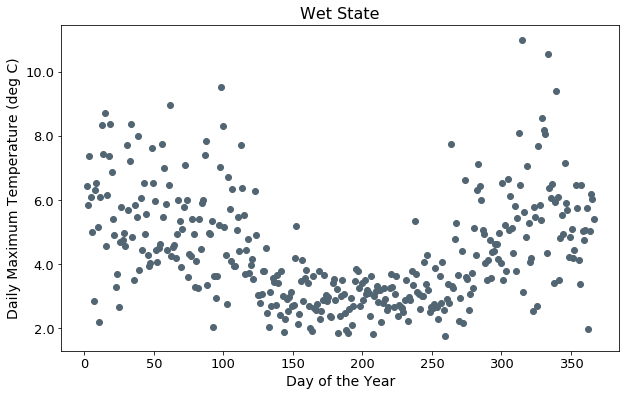

In [15]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("Wet State", fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Try the Fourier series transform

In [18]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

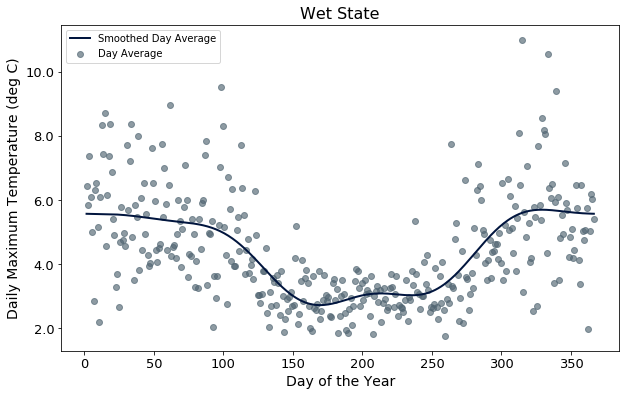

In [19]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:slate', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [20]:
Tave = np.array( WetDF['Tmean_C'], dtype=np.float32 )

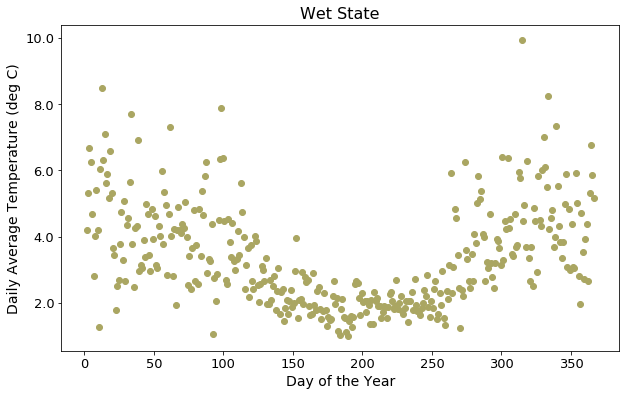

In [21]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tave, c='xkcd:khaki', marker='o' )
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Average Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [22]:
rft = np.fft.rfft(Tave)
rft[SM_NUM:] = 0.0
tave_smooth = np.fft.irfft(rft)

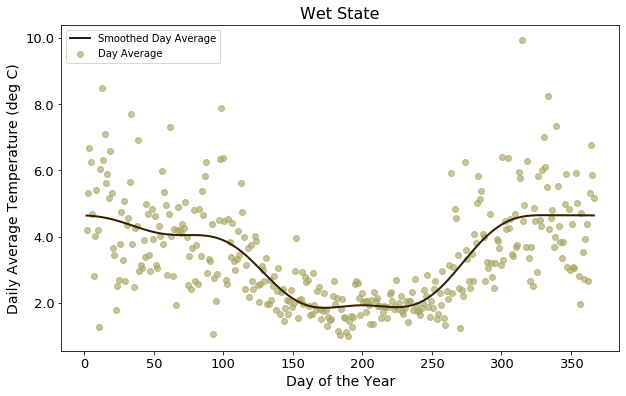

In [23]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tave, c='xkcd:khaki', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tave_smooth, linestyle='-', color='xkcd:dark brown', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Average Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [24]:
Tmin = np.array( WetDF['Tmin_C'], dtype=np.float32 )

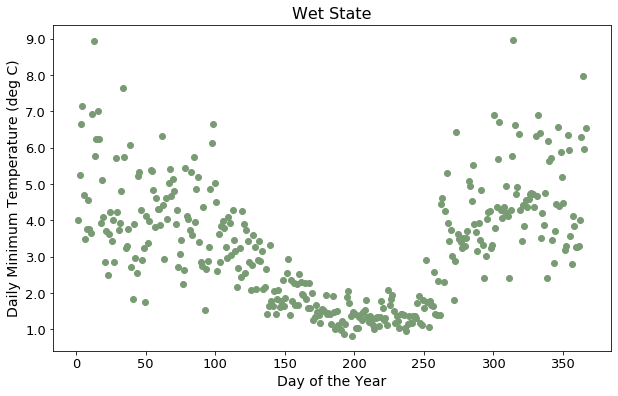

In [25]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o' )
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [26]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

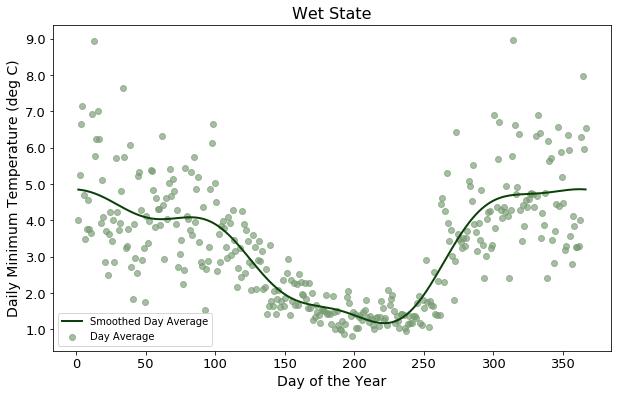

In [27]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:grey green', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

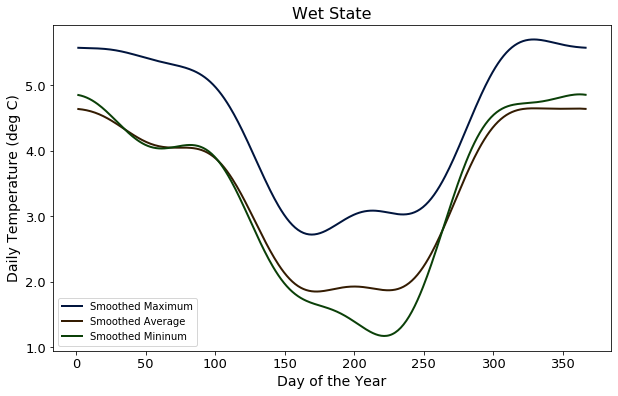

In [28]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:navy', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tave_smooth, linestyle='-', color='xkcd:dark brown', linewidth=2.0, 
           label="Smoothed Average")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:hunter green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [29]:
OutCols

['Tmax_C', 'Tmean_C', 'Tmin_C', 'DewPtT_C', 'RelHum']

In [30]:
DaysIndexer = np.array( WetDF.index, dtype=np.int32 )
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tave_smooth,
             OutCols[2] : tmin_smooth,
           }
OutWetDF = pd.DataFrame(index=DaysIndexer, data=DataDict )

### Dry State

In [31]:
Tmax = np.array( DryDF['Tmax_C'], dtype=np.float32 )

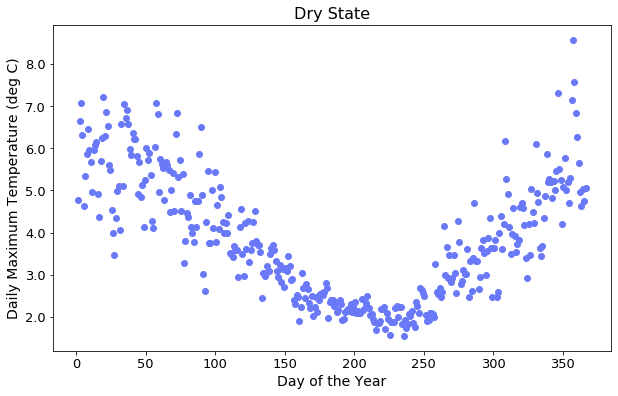

In [32]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.set_title("Dry State", fontsize=16)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [33]:
rft = np.fft.rfft(Tmax)
rft[SM_NUM:] = 0.0
tmax_smooth = np.fft.irfft(rft)

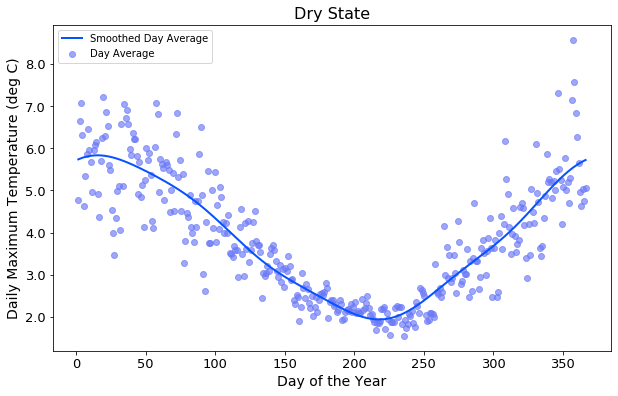

In [34]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmax, c='xkcd:cornflower', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Maximum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [35]:
Tave = np.array( DryDF['Tmean_C'], dtype=np.float32 )

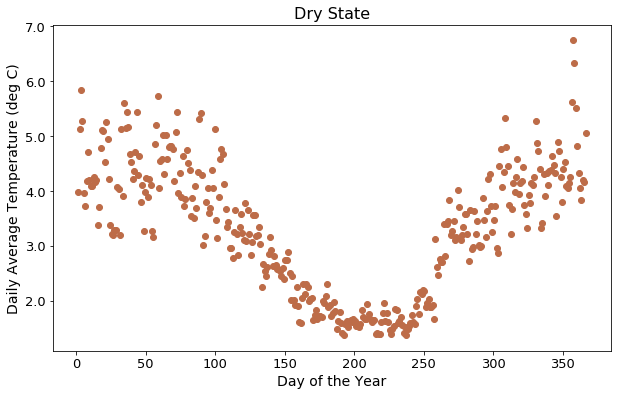

In [36]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tave, c='xkcd:adobe', marker='o' )
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Average Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [37]:
rft = np.fft.rfft(Tave)
rft[SM_NUM:] = 0.0
tave_smooth = np.fft.irfft(rft)

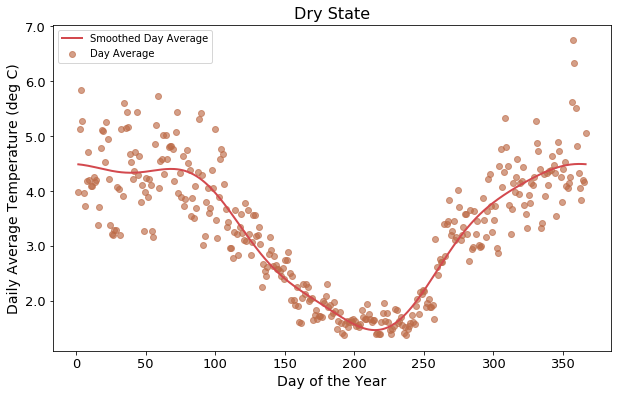

In [38]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tave, c='xkcd:adobe', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tave_smooth, linestyle='-', color='xkcd:faded red', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Average Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [39]:
Tmin = np.array( DryDF['Tmin_C'], dtype=np.float32 )

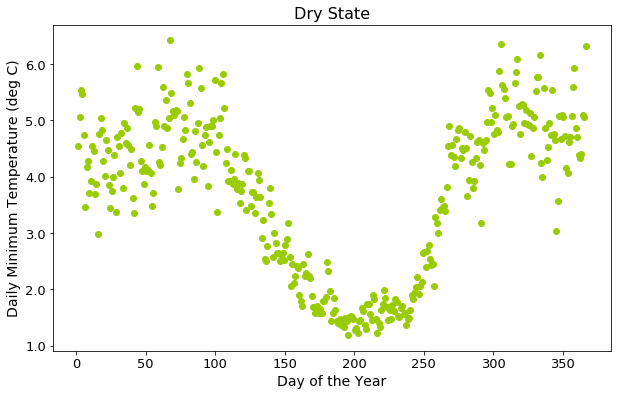

In [40]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o' )
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [41]:
rft = np.fft.rfft(Tmin)
rft[SM_NUM:] = 0.0
tmin_smooth = np.fft.irfft(rft)

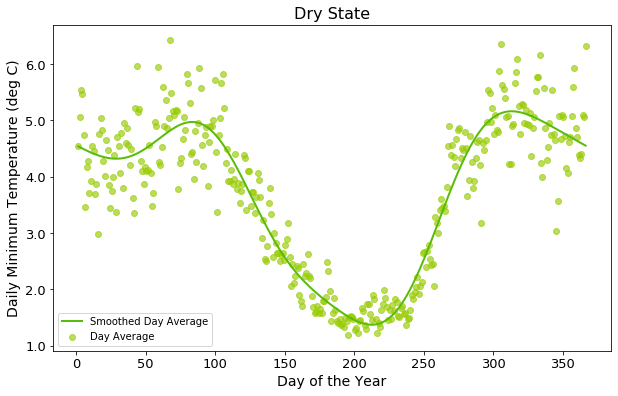

In [42]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Tmin, c='xkcd:slime green', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Minimum Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

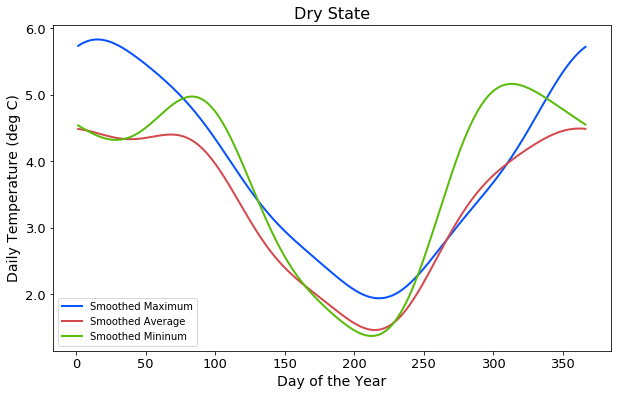

In [43]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AllDays, tmax_smooth, linestyle='-', color='xkcd:electric blue', linewidth=2.0, 
           label="Smoothed Maximum")
ax11.plot( AllDays, tave_smooth, linestyle='-', color='xkcd:faded red', linewidth=2.0, 
           label="Smoothed Average")
ax11.plot( AllDays, tmin_smooth, linestyle='-', color='xkcd:frog green', linewidth=2.0, 
           label="Smoothed Mininum")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [44]:
DataDict = { OutCols[0] : tmax_smooth,
             OutCols[1] : tave_smooth,
             OutCols[2] : tmin_smooth,
           }
OutDryDF = pd.DataFrame(index=DaysIndexer, data=DataDict )

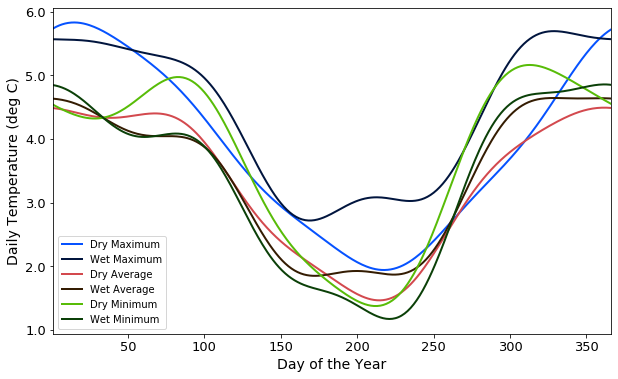

In [45]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
OutDryDF.plot( y=OutCols[0], color='xkcd:electric blue', linewidth=2.0, ax=ax11, 
               label='Dry Maximum' )
OutWetDF.plot( y=OutCols[0], color='xkcd:navy', linewidth=2.0, ax=ax11, 
               label='Wet Maximum' )
OutDryDF.plot( y=OutCols[1], color='xkcd:faded red', linewidth=2.0, ax=ax11, 
               label='Dry Average' )
OutWetDF.plot( y=OutCols[1], color='xkcd:dark brown', linewidth=2.0, ax=ax11, 
               label='Wet Average' )
OutDryDF.plot( y=OutCols[2], color='xkcd:frog green', linewidth=2.0, ax=ax11, 
               label='Dry Minimum' )
OutWetDF.plot( y=OutCols[2], color='xkcd:hunter green', linewidth=2.0, ax=ax11, 
               label='Wet Minimum' )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Temperature (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Fourier Smoothing of Dewpoint and Relative Humidity

### Wet State

In [46]:
Dpoint = np.array( WetDF[OutCols[3]], dtype=np.float32 )
Rhum = np.array( WetDF[OutCols[4]], dtype=np.float32 )

In [47]:
rft = np.fft.rfft(Dpoint)
rft[SM_NUM:] = 0.0
dpt_smooth = np.fft.irfft(rft)

In [48]:
rft = np.fft.rfft(Rhum)
rft[SM_NUM:] = 0.0
rh_smooth = np.fft.irfft(rft)

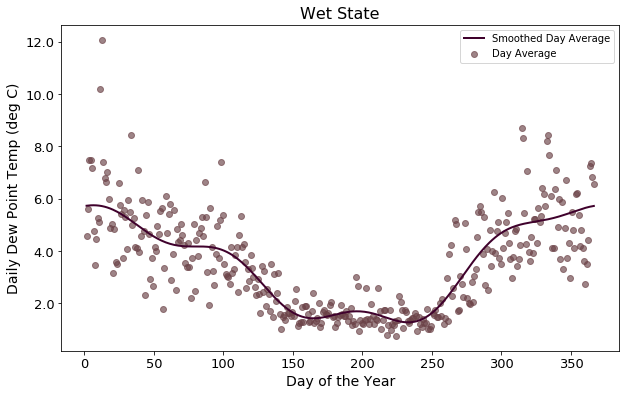

In [49]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Dpoint, c='xkcd:purplish brown', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, dpt_smooth, linestyle='-', color='xkcd:dark plum', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Dew Point Temp (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

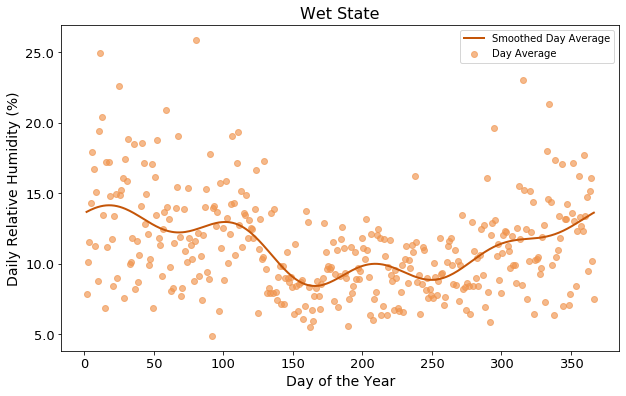

In [50]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Rhum, c='xkcd:faded orange', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, rh_smooth, linestyle='-', color='xkcd:rust orange', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Wet State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Relative Humidity (%)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [51]:
OutWetDF[OutCols[3]] = dpt_smooth
OutWetDF[OutCols[4]] = rh_smooth

### Dry State

In [52]:
Dpoint = np.array( DryDF[OutCols[3]], dtype=np.float32 )
Rhum = np.array( DryDF[OutCols[4]], dtype=np.float32 )

In [53]:
rft = np.fft.rfft(Dpoint)
rft[SM_NUM:] = 0.0
dpt_smooth = np.fft.irfft(rft)

In [54]:
rft = np.fft.rfft(Rhum)
rft[SM_NUM:] = 0.0
rh_smooth = np.fft.irfft(rft)

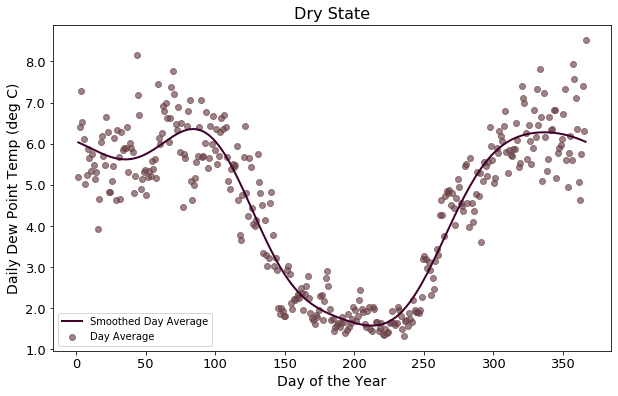

In [55]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Dpoint, c='xkcd:purplish brown', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, dpt_smooth, linestyle='-', color='xkcd:dark plum', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Dew Point Temp (deg C)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

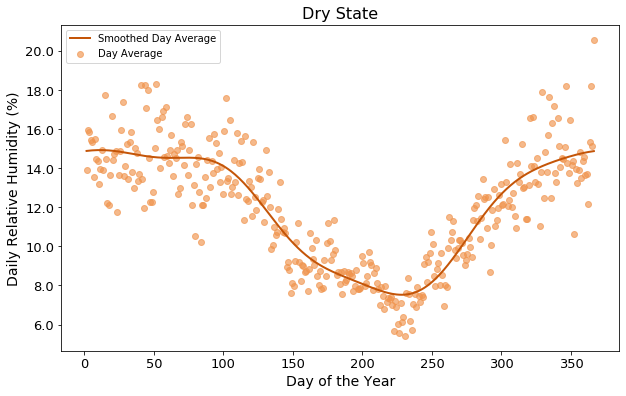

In [56]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AllDays, Rhum, c='xkcd:faded orange', marker='o', alpha=0.65, label="Day Average")
ax11.plot( AllDays, rh_smooth, linestyle='-', color='xkcd:rust orange', linewidth=2.0, 
           label="Smoothed Day Average")
ax11.set_title('Dry State', fontsize=16 )
ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Daily Relative Humidity (%)', fontsize=14)
ax11.legend()
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [57]:
OutDryDF[OutCols[3]] = dpt_smooth
OutDryDF[OutCols[4]] = rh_smooth

## Output Smoothed

In [58]:
display( HTML( OutWetDF.describe().to_html() ) )

,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,4.395838,3.385248,3.301956,3.493980,11.219335
std,1.120951,1.088297,1.313724,1.575165,1.751505
min,2.717749,1.848326,1.170178,1.273695,8.411937
25%,3.080055,2.068160,1.831365,1.677792,9.539658
50%,4.780412,3.843135,3.918353,3.972935,11.638271
75%,5.497676,4.417080,4.526891,4.988363,12.666204
max,5.695402,4.644382,4.857731,5.747825,14.138468


In [59]:
display( HTML( OutDryDF.describe().to_html() ) )

,Tmax_C,Tmean_C,Tmin_C,DewPtT_C,RelHum
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,3.840539,3.294615,3.692805,4.479619,11.911390
std,1.313383,1.086107,1.309021,1.777265,2.722467
min,1.940233,1.463136,1.373349,1.577030,7.522561
25%,2.623511,2.221594,2.380291,2.542008,9.042726
50%,3.740766,3.637967,4.341780,5.517080,12.854038
75%,5.118011,4.346455,4.790712,6.046748,14.526958
max,5.831753,4.492445,5.163734,6.356345,14.923950


In [60]:
OutXLSX = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_Std_1981-2010.xlsx" ))
with pd.ExcelWriter(OutXLSX) as writer:
    OutWetDF.to_excel( writer, sheet_name="Wet Days", index=True, 
                       index_label="Days", columns=OutCols )
    OutDryDF.to_excel( writer, sheet_name="Dry Days", index=True, 
                       index_label="Days", columns=OutCols )

In [61]:
PickOut = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Wet_Smooth_Std_1981-2010.pickle" ))
OutWetDF.to_pickle( PickOut )
PickOut = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Dry_Smooth_Std_1981-2010.pickle" ))
OutDryDF.to_pickle( PickOut )